In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("car_price_dataset.csv")
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [3]:
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


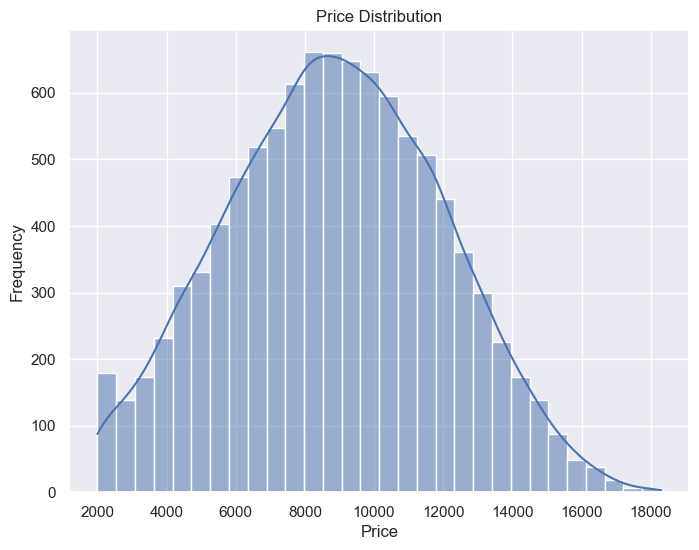

In [5]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8, 6))

sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.show()

The histogram shows the distribution of car prices. Most cars fall within a lower price range, with fewer cars at higher prices. The KDE curve highlights the density of price values.

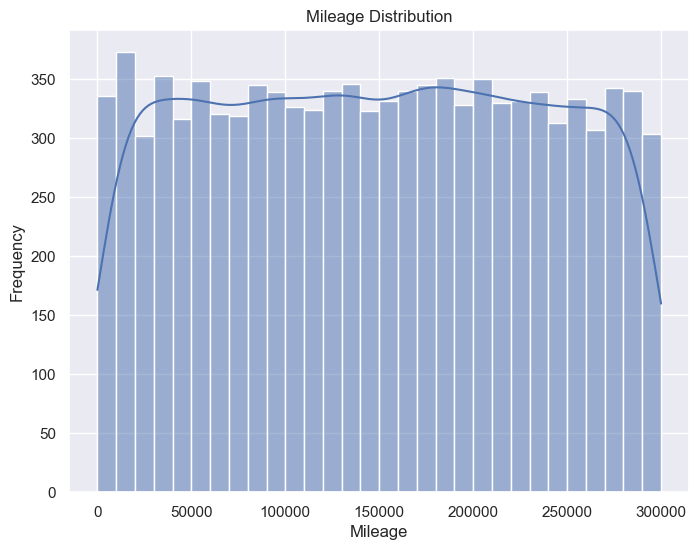

In [6]:
plt.figure(figsize=(8, 6))

sns.histplot(df['Mileage'], bins=30, kde=True)
plt.title("Mileage Distribution")
plt.xlabel("Mileage")
plt.ylabel("Frequency")

plt.show()

### Conclusion:  
The histogram shows the distribution of car mileage. Most cars have mileage in a specific range, with fewer cars at extremely high or low mileage. The KDE curve highlights density variations.

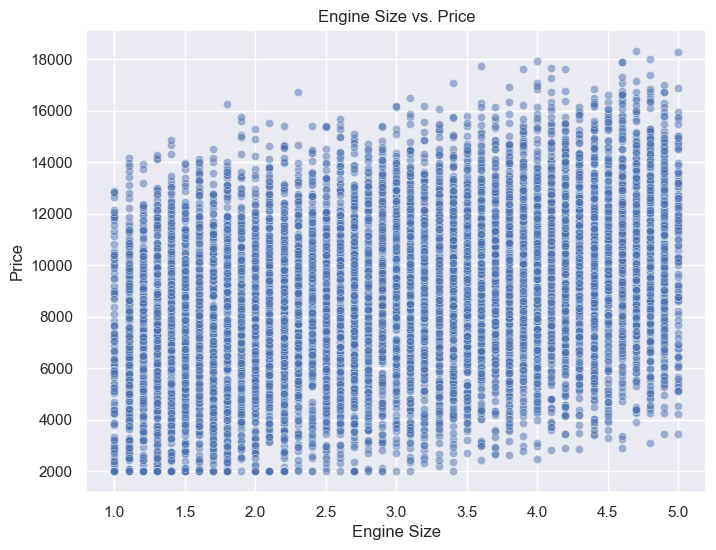

In [7]:
plt.figure(figsize=(8, 6))

sns.scatterplot(x=df['Engine_Size'], y=df['Price'], alpha=0.5)
plt.title("Engine Size vs. Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

plt.show()


### Conclusion:  
The scatter plot shows a positive correlation between engine size and price. Larger engine sizes tend to have higher prices, but there is some variability in the data.

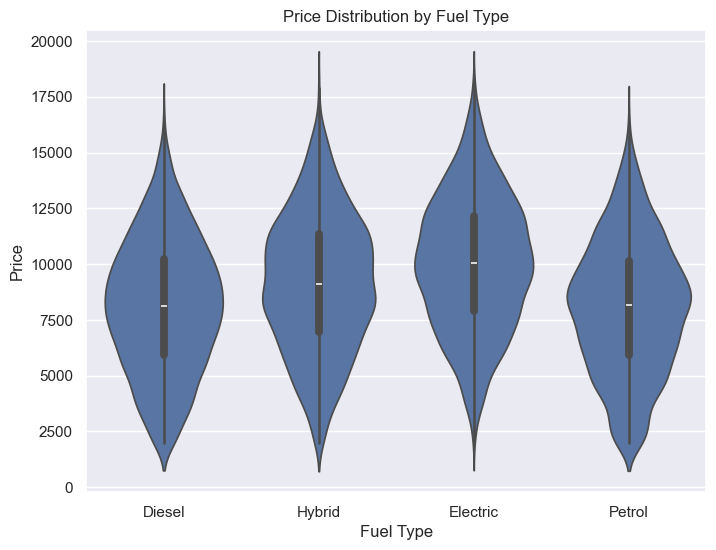

In [8]:
plt.figure(figsize=(8, 6))

sns.violinplot(x=df['Fuel_Type'], y=df['Price'])
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")

plt.show()


The violin plot indicates that fuel type significantly influences price distribution. Some fuel types show a wider range of prices, while others are more concentrated around specific values.

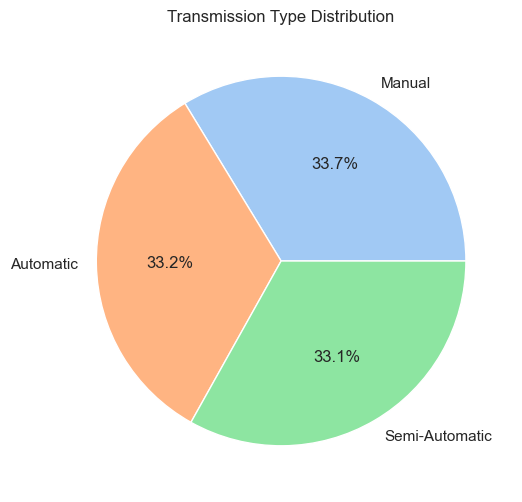

In [9]:
plt.figure(figsize=(6, 6))

transmission_counts = df['Transmission'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("Transmission Type Distribution")

plt.show()


The pie chart shows the distribution of different transmission types in the dataset. Some transmission types are more common, while others have a smaller market share.

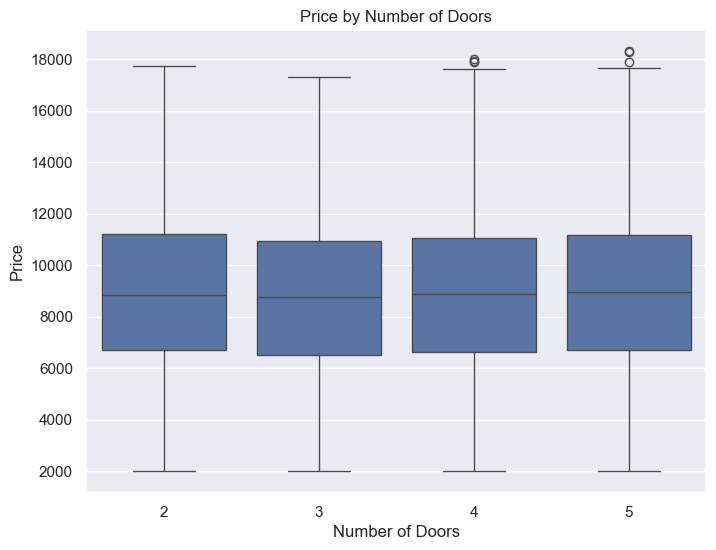

In [10]:
plt.figure(figsize=(8, 6))

sns.boxplot(x=df['Doors'], y=df['Price'])
plt.title("Price by Number of Doors")
plt.xlabel("Number of Doors")
plt.ylabel("Price")

plt.show()


The box plot shows how car prices vary based on the number of doors. Cars with more doors may have higher price ranges, but outliers suggest some expensive models exist in all categories.

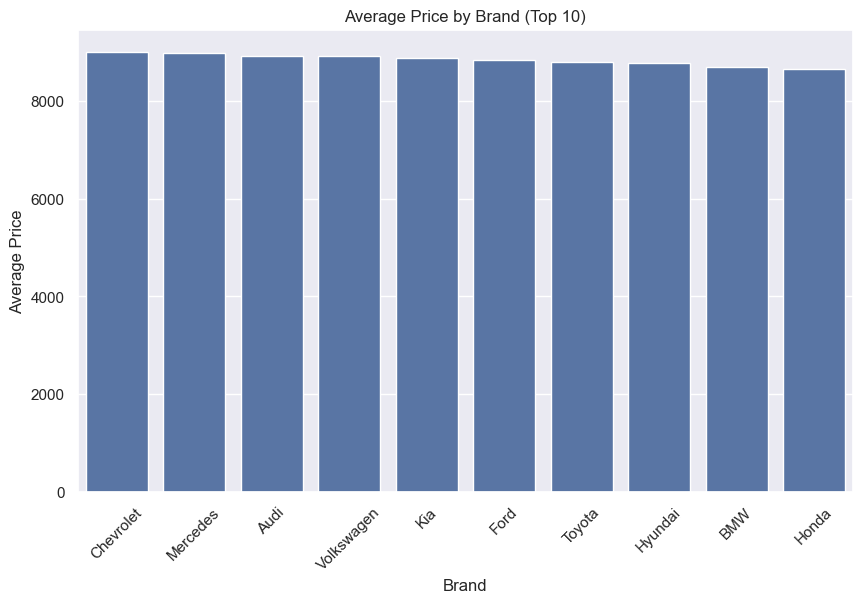

In [11]:
plt.figure(figsize=(10, 6))
top_brands = df.groupby("Brand")["Price"].mean().nlargest(10)
sns.barplot(x=top_brands.index, y=top_brands.values)
plt.title("Average Price by Brand (Top 10)")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()


The bar plot highlights the top 10 car brands with the highest average prices. Some luxury brands dominate the list, indicating a correlation between brand reputation and pricing.

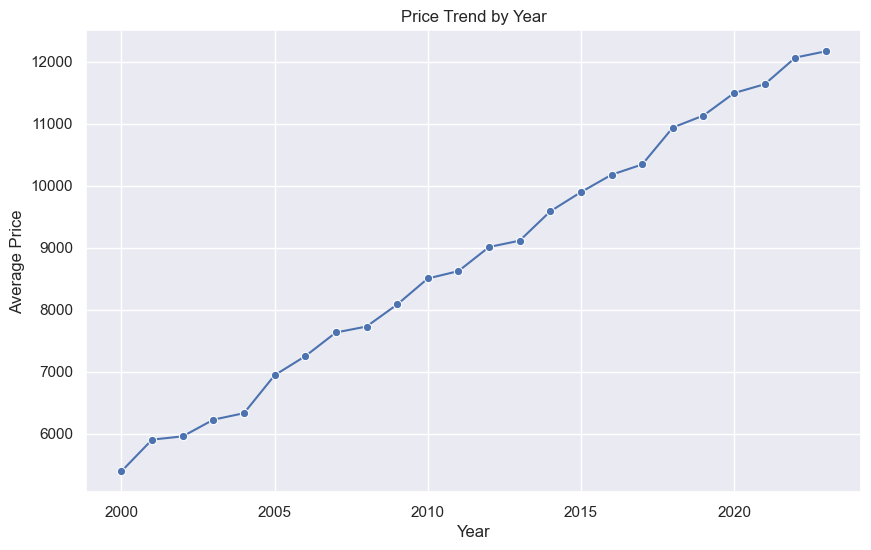

In [12]:
plt.figure(figsize=(10, 6))

yearly_avg_price = df.groupby("Year")["Price"].mean()
sns.lineplot(x=yearly_avg_price.index, y=yearly_avg_price.values, marker="o")
plt.title("Price Trend by Year")
plt.xlabel("Year")
plt.ylabel("Average Price")

plt.show()


The line plot shows that average car prices fluctuate over the years. Generally, newer models tend to have higher prices, reflecting technological advancements and inflation.

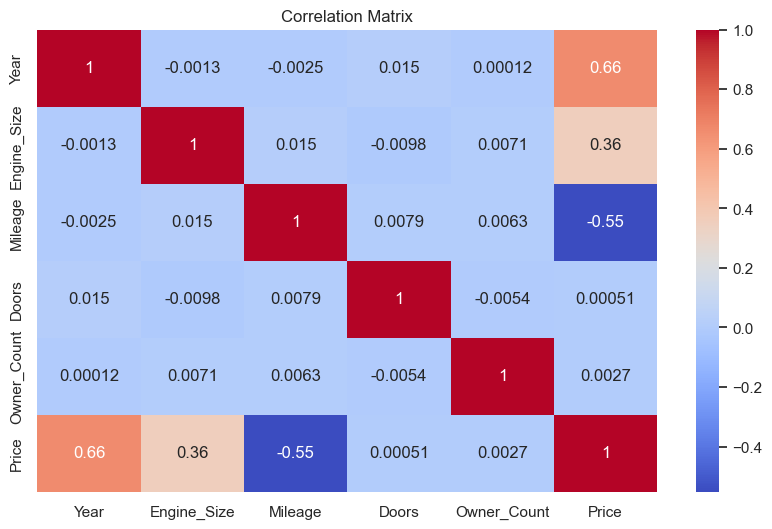

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


The heatmap reveals relationships between numerical features in the dataset. Strong correlations (closer to 1 or -1) indicate dependencies, such as price increasing with engine size or mileage affecting depreciation.

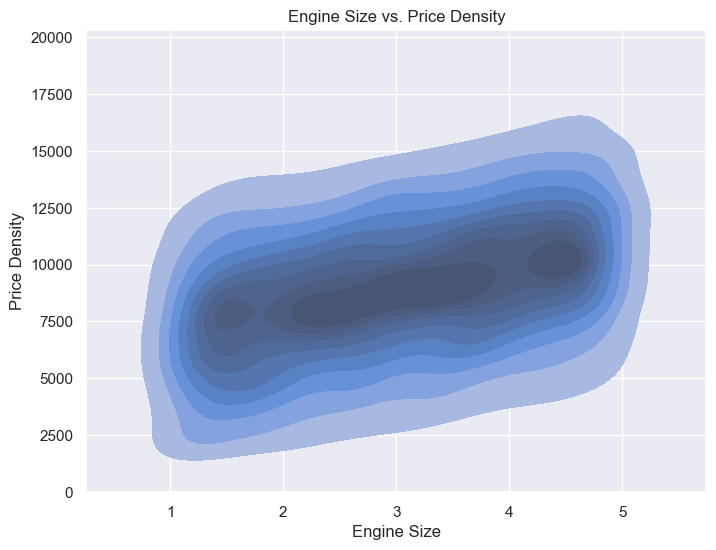

In [14]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df['Engine_Size'], y=df['Price'], fill=True)
plt.title("Engine Size vs. Price Density")
plt.xlabel("Engine Size")
plt.ylabel("Price Density")
plt.show()


The KDE plot shows how price density varies with engine size. Higher engine sizes generally correlate with higher prices, forming dense price clusters.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [16]:
df.dropna(inplace=True)
label_encoders = {}
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 
max_price = df['Price'].max()
print(f"Maximum Price in Dataset: {max_price}")
if max_price < 30000:
    price_bins = [0, max_price/3, 2*(max_price/3), max_price + 1]  # Dynamic bins
else:
    price_bins = [0, 10000, 30000, max_price + 1]  # Default bins

price_labels = ['Low', 'Medium', 'High']
df['Price_Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)
le_price = LabelEncoder()
df['Price_Category'] = le_price.fit_transform(df['Price_Category'])
X = df.drop(columns=['Price', 'Price_Category'])  # Features
y = df['Price_Category'] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Maximum Price in Dataset: 18301


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [19]:
y_pred = model.predict(X_test)


In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[ 236    0   54]
 [   0  322   49]
 [  12   29 1298]]


In [21]:
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=price_labels))
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Model Accuracy: {accuracy * 100:.2f}%")


Classification Report:
               precision    recall  f1-score   support

         Low       0.95      0.81      0.88       290
      Medium       0.92      0.87      0.89       371
        High       0.93      0.97      0.95      1339

    accuracy                           0.93      2000
   macro avg       0.93      0.88      0.91      2000
weighted avg       0.93      0.93      0.93      2000

Random Forest Model Accuracy: 92.80%
